## Введение

Первичные данные для нашего исследования были собраны с помощью опроса студентов ФГГТ через гугл-форму и записаны в таблице формата *xls*. После таблица была переведена в формат *txt* для чтения в 'python'. Эти исходные данные содержат: **номер курса** (также есть вариант "я выпускник"), **специальность** и **дату рождения** учащегося


In [57]:
# Открываем исходный файл в 'python':
# Не забудьте изменить директорию файла для своего локального устройства
with open('data/first_information.txt', encoding = 'utf8') as f:
    first_information = f.read()   # считываем файл, как строку, чтобы понять, что разделяет элементы внутри
                                                            
first_information

'2\tФизическая география\t25.05.2005\n2\tОбщественная география\t17.11.2005\n2\tОбщественная география\t24.03.2005\n1\tГИС\t07.10.2006\n2\tФизическая география\t08.03.2006\n2\tОбщественная география\t30.10.2005\n2\tГИС\t07.06.2005\n2\tОбщественная география\t04.05.2024\n1\tОбщественная география\t30.05.2006\n2\tОбщественная география\t24.10.2004\n3\tОбщественная география\t10.10.2003\n2\tОбщественная география\t20.02.2005\n3\tОбщественная география\t24.06.2004\n2\tГИС\t19.03.2005\n3\tОбщественная география\t27.04.2004\n3\tОбщественная география\t26.04.2004\n3\tОбщественная география\t15.12.2002\n3\tФизическая география\t15.06.2004\n3\tОбщественная география\t13.11.2003\n1\tГИС\t16.12.2006\n3\tГИС\t13.12.2000\n2\tФизическая география\t07.09.2005\n3\tОбщественная география\t24.05.2004\n3\tОбщественная география\t24.05.2004\n4\tГИС\t05.03.2002\n3\tФизическая география\t14.02.2001\n3\tФизическая география\t05.03.2004\n3\tГИС\t20.06.2004\n3\tФизическая география\t13.12.2004\n2\tОбщественная

## Обработка данных

Далее, чтобы привести данные в "читаемый" вид мы разделяем эту строку сначала по символу "\n", т.е. по одному студенту, а потом заменяем символ "\t", который обозначает пробел, на нормальный пробел (" ")

In [60]:
new_date = []
for element in first_information:
    new_date = first_information.split('\n')               # разделяем список по пробелу, чтобы получить 1 элемент = 1 студент

information_done = []
for i in range(len(new_date)):                             
   information_done.append(new_date[i].replace('\t',' '))  # создаём новый список, где символ \t заменён на пробел ' ' 
                                                           
print(information_done)                                

['2 Физическая география 25.05.2005', '2 Общественная география 17.11.2005', '2 Общественная география 24.03.2005', '1 ГИС 07.10.2006', '2 Физическая география 08.03.2006', '2 Общественная география 30.10.2005', '2 ГИС 07.06.2005', '2 Общественная география 04.05.2024', '1 Общественная география 30.05.2006', '2 Общественная география 24.10.2004', '3 Общественная география 10.10.2003', '2 Общественная география 20.02.2005', '3 Общественная география 24.06.2004', '2 ГИС 19.03.2005', '3 Общественная география 27.04.2004', '3 Общественная география 26.04.2004', '3 Общественная география 15.12.2002', '3 Физическая география 15.06.2004', '3 Общественная география 13.11.2003', '1 ГИС 16.12.2006', '3 ГИС 13.12.2000', '2 Физическая география 07.09.2005', '3 Общественная география 24.05.2004', '3 Общественная география 24.05.2004', '4 ГИС 05.03.2002', '3 Физическая география 14.02.2001', '3 Физическая география 05.03.2004', '3 ГИС 20.06.2004', '3 Физическая география 13.12.2004', '2 Общественная

## Дробление данных

Так как выбор специальности происходит только после 2 курса, есть студенты, которые ещё находятся в стадии выбора направления, а есть те, кто уже избрал свой путь. Поэтому общий список information_done разделим на 2 списка соответственно для 1-2 курса и для 3-4 и выпускников и будем рассматривать их по отдельности

In [63]:
first_second_course = []                                                    # список для 1-2 курса
third_fourth_graduated = []                                                 # список для 3-4 курса и выпускников
for string in information_done:
    if string[0] == '1' or string[0] == '2':
        first_second_course.append(string)
    if string[0] == '3' or string[0] == '4' or string[:11] == 'Я выпускник':
        third_fourth_graduated.append(string)
print(f'{first_second_course}\n{third_fourth_graduated}')                   # конечные списки, разделённые через "\n" для более удобного чтения

['2 Физическая география 25.05.2005', '2 Общественная география 17.11.2005', '2 Общественная география 24.03.2005', '1 ГИС 07.10.2006', '2 Физическая география 08.03.2006', '2 Общественная география 30.10.2005', '2 ГИС 07.06.2005', '2 Общественная география 04.05.2024', '1 Общественная география 30.05.2006', '2 Общественная география 24.10.2004', '2 Общественная география 20.02.2005', '2 ГИС 19.03.2005', '1 ГИС 16.12.2006', '2 Физическая география 07.09.2005', '2 Общественная география 15.03.2005', '2 ГИС 18.11.2005', '1 Общественная география 30.05.2006', '1 Общественная география 05.02.2007', '1 Общественная география 14.06.2005', '1 Общественная география 31.10.2006', '1 Общественная география 21.06.2006', '1 ГИС 13.06.2006', '1 ГИС 31.05.2006', '1 ГИС 24.11.2005', '2 ГИС 25.08.2005', '1 Общественная география 08.01.2006', '2 Физическая география 26.12.2005', '1 Общественная география 18.06.2007', '1 Общественная география 11.05.2006', '1 Физическая география 20.03.2006', '1 Обществ

## Создание встроенных кортежей

Ниже представлены кортежи, в которых обозначены пограничные даты для каждого знака зодиака.

Кортежи были использованы, потому что с их помощью можно сравнивать даты. Ссылка на метод: *https://stackoverflow.com/questions/5464410/how-to-tell-if-a-date-is-between-two-other-dates*

Вид записи:

*знак_зодиака_start = (месяц, день) - первый день для знака зодиака*

*знак_зодиака_end = (месяц, день) - последний день для знака зодиака*

In [68]:
aries_start = (3, 21)        # Овен — с 21 марта по 19 апреля. 
aries_end = (4, 19)

taurus_start = (4, 20)       # Телец — с 20 апреля по 20 мая.
taurus_end = (5, 20)

gemini_start = (5, 21)       # Близнецы — с 21 мая по 20 июня. 
gemini_end = (6, 20)

cancer_start = (6, 22)       # Рак — с 22 июня по 22 июля. 
cancer_end = (7, 22) 

leo_start = (7, 23)          # Лев — с 23 июля по 22 августа. 
leo_end = (8, 22)

virgo_start = (8, 23)        # Дева — с 23 августа по 22 сентября. 
virgo_end = (9, 22)

libra_start = (9, 23)        # Весы — с 23 сентября по 22 октября. 
libra_end = (10, 22)

scorpio_start = (10, 23)     # Скорпион — с 23 октября по 21 ноября. 
scorpio_end = (11, 21)

sagittarius_start = (11, 22) # Стрелец — с 22 ноября по 21 декабря.
sagittarius_end = (12, 21)
                             # Козерог — с 22 декабря по 20 января.
                             # т.к. козерог с 22 декабря одного года по 20 января следующего, то нужно разделить его: сделать одну часть которая будет включать даты с 22 декабря до 31 декабря одного года, и другую - с 1 по 20 января другого
capricorn_start_1 = (12, 22) # период козерога с 22 по 31 декабря одного года 
capricorn_end_1 = (12, 31)
capricorn_start_2 = (1, 1)   # период козерга с 1 по 20 января следующего года
capricorn_end_2 = (1, 20)

aquarius_start = (1, 21)     # Водолей — с 21 января по 18 февраля.
aquarius_end = (2, 18)

pisces_start = (2, 19)       # Рыбы — с 19 февраля по 20 марта. 
pisces_end = (3, 20)

## Код, код, код

Сначала мы работаем со списком студентов 1-2 курса.

Для этого создаём *вложенный словарь*, где главными **ключами** будут 3 направления: *Физы* (физическая география), *Общ* (общественная география) и *ГИС* (геоинформационные технологии). Их **значения** - это словари, в которых *ключами являются 12 знаков зодиака*.

In [71]:
# dict_f_s_c - словарь для списка со студентами 1-2 курса
dict_f_s_c = {'Физы': {'Овен':0, 'Телец': 0,'Близнецы': 0,'Рак': 0,'Лев': 0,'Дева': 0,'Весы': 0,'Скорпион': 0,'Стрелец':0,'Козерог': 0,'Водолей': 0,'Рыбы': 0},
              'Общ': {'Овен':0, 'Телец': 0,'Близнецы': 0,'Рак': 0,'Лев': 0,'Дева': 0,'Весы': 0,'Скорпион': 0,'Стрелец':0,'Козерог': 0,'Водолей': 0,'Рыбы': 0},
              'ГИС':{'Овен':0, 'Телец': 0,'Близнецы': 0,'Рак': 0,'Лев': 0,'Дева': 0,'Весы': 0,'Скорпион': 0,'Стрелец':0,'Козерог': 0,'Водолей': 0,'Рыбы': 0}}

Теперь в цикле мы находим в элементе списка дату рождения студента и проверяем, к чему этот элемент списка относится: физической, общественной географии или ГИС. 

Далее идёт поиск соответствия даты рождения с границами знака зодиака: если дата рождения находится между датой начала и датой конца для знака зодиака, то это и есть знак зодиака этого человека. Например, Аня 17.11 - это число находится между 23.10 и 21.11, значит Аня - скорпион)

Если соответсвие найдено, то мы записываем в список 1-2 курса название этого знака зодиака, а в словарь - количество человек с этим знаком зодиака

In [74]:
for i in range(len(first_second_course)):    
    month = int(first_second_course[i][-7:-5]) # за значение месяца принимаем с 7 по 5 элемент, считая с конца, в строке ученика, переводим в int
    day = int(first_second_course[i][-10:-8]) # за значение дня принимаем с 10 по 8 элемент, считая с конца, в строке ученика, переводим в int
    only_date_of_birth = (month,day) # добавили день и месяц рождения в кортеж, чтобы потом сравнить со знакми зодиака 
    if first_second_course[i][2:5] == 'Физ': # проверяем направление Физической географии
        if  capricorn_start_1 <= only_date_of_birth <= capricorn_end_1 or capricorn_start_2 <= only_date_of_birth <= capricorn_end_2:#проверяем на ЗЗ, для козерогов условие длинее из-за того, что он разделён на 2 перида (конец одного года и начало другого)
            dict_f_s_c['Физы']['Козерог'] += 1 # если проверка на знак зодиака успешна, то добавляем этого студента во вложенный словарь
            first_second_course[i] = first_second_course[i] + " - это козерог"#доваляем название знака зодиака в строку с информацией о студенте
        if aquarius_start <= only_date_of_birth <= aquarius_end: # проверяем знаки зодиака
            dict_f_s_c['Физы']['Водолей'] += 1
            first_second_course[i] = first_second_course[i] + " - это водолей"
        if pisces_start <= only_date_of_birth <= pisces_end:
            dict_f_s_c['Физы']['Рыбы'] += 1
            first_second_course[i] = first_second_course[i] + " - это рыбы"
        if aries_start <= only_date_of_birth <= aries_end:
            dict_f_s_c['Физы']['Овен'] += 1
            first_second_course[i] = first_second_course[i] + " - это овен"
        if taurus_start <= only_date_of_birth <= taurus_end:
            dict_f_s_c['Физы']['Телец'] +=1
            first_second_course[i] = first_second_course[i] + " - это телец"
        if gemini_start <= only_date_of_birth <= gemini_end:
            dict_f_s_c['Физы']['Близнецы'] +=1 
            first_second_course[i] = first_second_course[i] + " - это близнецы"
        if cancer_start <= only_date_of_birth <= cancer_end:
            dict_f_s_c['Физы']['Рак'] += 1 
            first_second_course[i] = first_second_course[i] + " - это рак"
        if leo_start <= only_date_of_birth <= leo_end:
            dict_f_s_c['Физы']['Лев'] += 1
            first_second_course[i] = first_second_course[i] + " - это лев"
        if virgo_start <= only_date_of_birth <= virgo_end:
            dict_f_s_c['Физы']['Дева'] += 1 
            first_second_course[i] = first_second_course[i] + " - это дева"
        if libra_start <= only_date_of_birth <= libra_end:
            dict_f_s_c['Физы']['Весы'] +=1
            first_second_course[i] = first_second_course[i] + " - это весы"
        if scorpio_start <= only_date_of_birth <= scorpio_end:
            dict_f_s_c['Физы']['Скорпион'] += 1
            first_second_course[i] = first_second_course[i] + " - это скорпион"
        if sagittarius_start <= only_date_of_birth <= sagittarius_end:
            dict_f_s_c['Физы']['Стрелец'] += 1
            first_second_course[i] = first_second_course[i] + " - это стрелец"
    if first_second_course[i][2:5] == 'Общ':# проверяем направление Общественной географии
        if  capricorn_start_1 <= only_date_of_birth <= capricorn_end_1 or capricorn_start_2 <= only_date_of_birth <= capricorn_end_2:
            dict_f_s_c['Общ']['Козерог'] += 1 
            first_second_course[i] = first_second_course[i] + " - это козерог"
        if aquarius_start <= only_date_of_birth <= aquarius_end:
            dict_f_s_c['Общ']['Водолей'] += 1
            first_second_course[i] = first_second_course[i] + " - это водолей"
        if pisces_start <= only_date_of_birth <= pisces_end:
            dict_f_s_c['Общ']['Рыбы'] += 1
            first_second_course[i] = first_second_course[i] + " - это рыбы"
        if aries_start <= only_date_of_birth <= aries_end:
            dict_f_s_c['Общ']['Овен'] += 1
            first_second_course[i] = first_second_course[i] + " - это овен"
        if taurus_start <= only_date_of_birth <= taurus_end:
            dict_f_s_c['Общ']['Телец'] +=1
            first_second_course[i] = first_second_course[i] + " - это телец"
        if gemini_start <= only_date_of_birth <= gemini_end:
            dict_f_s_c['Общ']['Близнецы'] +=1 
            first_second_course[i] = first_second_course[i] + " - это близнецы"
        if cancer_start <= only_date_of_birth <= cancer_end:
            dict_f_s_c['Общ']['Рак'] += 1 
            first_second_course[i] = first_second_course[i] + " - это рак"
        if leo_start <= only_date_of_birth <= leo_end:
            dict_f_s_c['Общ']['Лев'] += 1
            first_second_course[i] = first_second_course[i] + " - это лев"
        if virgo_start <= only_date_of_birth <= virgo_end:
            dict_f_s_c['Общ']['Дева'] += 1 
            first_second_course[i] = first_second_course[i] + " - это дева"
        if libra_start <= only_date_of_birth <= libra_end:
            dict_f_s_c['Общ']['Весы'] +=1
            first_second_course[i] = first_second_course[i] + " - это весы"
        if scorpio_start <= only_date_of_birth <= scorpio_end:
            dict_f_s_c['Общ']['Скорпион'] += 1
            first_second_course[i] = first_second_course[i] + " - это скорпион"
        if sagittarius_start <= only_date_of_birth <= sagittarius_end:
            dict_f_s_c['Общ']['Стрелец'] += 1
            first_second_course[i] = first_second_course[i] + " - это стрелец"
    if first_second_course[i][2:5] == 'ГИС':# проверяем ГИС направление
        if  capricorn_start_1 <= only_date_of_birth <= capricorn_end_1 or capricorn_start_2 <= only_date_of_birth <= capricorn_end_2:
            dict_f_s_c['ГИС']['Козерог'] += 1 
            first_second_course[i] = first_second_course[i] + " - это козерог"
        if aquarius_start <= only_date_of_birth <= aquarius_end:
            dict_f_s_c['ГИС']['Водолей'] += 1
            first_second_course[i] = first_second_course[i] + " - это водолей"
        if pisces_start <= only_date_of_birth <= pisces_end:
            dict_f_s_c['ГИС']['Рыбы'] += 1
            first_second_course[i] = first_second_course[i] + " - это рыбы"
        if aries_start <= only_date_of_birth <= aries_end:
            dict_f_s_c['ГИС']['Овен'] += 1
            first_second_course[i] = first_second_course[i] + " - это овен"
        if taurus_start <= only_date_of_birth <= taurus_end:
            dict_f_s_c['ГИС']['Телец'] +=1
            first_second_course[i] = first_second_course[i] + " - это телец"
        if gemini_start <= only_date_of_birth <= gemini_end:
            dict_f_s_c['ГИС']['Близнецы'] +=1 
            first_second_course[i] = first_second_course[i] + " - это близнецы"
        if cancer_start <= only_date_of_birth <= cancer_end:
            dict_f_s_c['ГИС']['Рак'] += 1 
            first_second_course[i] = first_second_course[i] + " - это рак"
        if leo_start <= only_date_of_birth <= leo_end:
            dict_f_s_c['ГИС']['Лев'] += 1
            first_second_course[i] = first_second_course[i] + " - это лев"
        if virgo_start <= only_date_of_birth <= virgo_end:
            dict_f_s_c['ГИС']['Дева'] += 1 
            first_second_course[i] = first_second_course[i] + " - это дева"
        if libra_start <= only_date_of_birth <= libra_end:
            dict_f_s_c['ГИС']['Весы'] +=1
            first_second_course[i] = first_second_course[i] + " - это весы"
        if scorpio_start <= only_date_of_birth <= scorpio_end:
            dict_f_s_c['ГИС']['Скорпион'] += 1
            first_second_course[i] = first_second_course[i] + " - это скорпион"
        if sagittarius_start <= only_date_of_birth <= sagittarius_end:
            dict_f_s_c['ГИС']['Стрелец'] += 1
            first_second_course[i] = first_second_course[i] + " - это стрелец"
print(f'Получившийся словарь для студентов 1-2 курса:\n{dict_f_s_c}')
print(f'Получившийся список для студентов 1-2 курса:\n{first_second_course}')

Получившийся словарь для студентов 1-2 курса:
{'Физы': {'Овен': 0, 'Телец': 0, 'Близнецы': 1, 'Рак': 1, 'Лев': 0, 'Дева': 1, 'Весы': 0, 'Скорпион': 0, 'Стрелец': 1, 'Козерог': 3, 'Водолей': 0, 'Рыбы': 2}, 'Общ': {'Овен': 2, 'Телец': 2, 'Близнецы': 5, 'Рак': 0, 'Лев': 1, 'Дева': 3, 'Весы': 0, 'Скорпион': 4, 'Стрелец': 0, 'Козерог': 3, 'Водолей': 2, 'Рыбы': 3}, 'ГИС': {'Овен': 2, 'Телец': 0, 'Близнецы': 4, 'Рак': 4, 'Лев': 1, 'Дева': 3, 'Весы': 2, 'Скорпион': 1, 'Стрелец': 2, 'Козерог': 2, 'Водолей': 0, 'Рыбы': 2}}
Получившийся список для студентов 1-2 курса:
['2 Физическая география 25.05.2005 - это близнецы', '2 Общественная география 17.11.2005 - это скорпион', '2 Общественная география 24.03.2005 - это овен', '1 ГИС 07.10.2006 - это весы', '2 Физическая география 08.03.2006 - это рыбы', '2 Общественная география 30.10.2005 - это скорпион', '2 ГИС 07.06.2005 - это близнецы', '2 Общественная география 04.05.2024 - это телец', '1 Общественная география 30.05.2006 - это близнецы', '2 Общ

Аналогично для второго списка со студентами старших курсов и выпускниками:

In [77]:
# dict_t_f_g_c - словарь для списка со студентами 3-4 курса и выпускников
dict_t_f_g_c = {'Физы': {'Овен':0, 'Телец': 0,'Близнецы': 0,'Рак': 0,'Лев': 0,'Дева': 0,'Весы': 0,'Скорпион': 0,'Стрелец':0,'Козерог': 0,'Водолей': 0,'Рыбы': 0},
              'Общ': {'Овен':0, 'Телец': 0,'Близнецы': 0,'Рак': 0,'Лев': 0,'Дева': 0,'Весы': 0,'Скорпион': 0,'Стрелец':0,'Козерог': 0,'Водолей': 0,'Рыбы': 0},
              'ГИС':{'Овен':0, 'Телец': 0,'Близнецы': 0,'Рак': 0,'Лев': 0,'Дева': 0,'Весы': 0,'Скорпион': 0,'Стрелец':0,'Козерог': 0,'Водолей': 0,'Рыбы': 0}}

for i in range(len(third_fourth_graduated)):
    month = int(third_fourth_graduated[i][-7:-5]) # за значение месяца принимаем с 7 по 5 элемент, считая с конца, в строке ученика, переводим в int
    day = int(third_fourth_graduated[i][-10:-8]) # за значение дня принимаем с 10 по 8 элемент, считая с конца, в строке ученика, переводим в int
    only_date_of_birth = (month,day) # добавили день и месяц рождения в кортеж, чтобы потом сравнить со знаками зодиака
    if 'Физ' in third_fourth_graduated[i]:
        if capricorn_start_1 <= only_date_of_birth <= capricorn_end_1 or capricorn_start_2 <= only_date_of_birth <= capricorn_end_2: # проверяем знаки зодиака
            dict_t_f_g_c['Физы']['Козерог'] += 1 
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это козерог"
        if aquarius_start <= only_date_of_birth <= aquarius_end:
            dict_t_f_g_c['Физы']['Водолей'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это водолей"
        if pisces_start <= only_date_of_birth <= pisces_end:
            dict_t_f_g_c['Физы']['Рыбы'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это рыбы"
        if aries_start <= only_date_of_birth <= aries_end:
            dict_t_f_g_c['Физы']['Овен'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это овен"
        if taurus_start <= only_date_of_birth <= taurus_end:
            dict_t_f_g_c['Физы']['Телец'] +=1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это телец"
        if gemini_start <= only_date_of_birth <= gemini_end:
            dict_t_f_g_c['Физы']['Близнецы'] +=1 
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это близнецы"
        if cancer_start <= only_date_of_birth <= cancer_end:
            dict_t_f_g_c['Физы']['Рак'] += 1 
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это рак"
        if leo_start <= only_date_of_birth <= leo_end:
            dict_t_f_g_c['Физы']['Лев'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это лев"
        if virgo_start <= only_date_of_birth <= virgo_end:
            dict_t_f_g_c['Физы']['Дева'] += 1 
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это дева"
        if libra_start <= only_date_of_birth <= libra_end:
            dict_t_f_g_c['Физы']['Весы'] +=1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это весы"
        if scorpio_start <= only_date_of_birth <= scorpio_end:
            dict_t_f_g_c['Физы']['Скорпион'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это скорпион"
        if sagittarius_start <= only_date_of_birth <= sagittarius_end:
            dict_t_f_g_c['Физы']['Стрелец'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это стрелец"
    if 'Общ' in third_fourth_graduated[i]:
        if capricorn_start_1 <= only_date_of_birth <= capricorn_end_1 or capricorn_start_2 <= only_date_of_birth <= capricorn_end_2:
            dict_t_f_g_c['Общ']['Козерог'] += 1 
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это козерог"
        if aquarius_start <= only_date_of_birth <= aquarius_end:
            dict_t_f_g_c['Общ']['Водолей'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это водолей"
        if pisces_start <= only_date_of_birth <= pisces_end:
            dict_t_f_g_c['Общ']['Рыбы'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это рыбы"
        if aries_start <= only_date_of_birth <= aries_end:
            dict_t_f_g_c['Общ']['Овен'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это овен"
        if taurus_start <= only_date_of_birth <= taurus_end:
            dict_t_f_g_c['Общ']['Телец'] +=1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это телец"
        if gemini_start <= only_date_of_birth <= gemini_end:
            dict_t_f_g_c['Общ']['Близнецы'] +=1 
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это близнецы"
        if cancer_start <= only_date_of_birth <= cancer_end:
            dict_t_f_g_c['Общ']['Рак'] += 1 
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это рак"
        if leo_start <= only_date_of_birth <= leo_end:
            dict_t_f_g_c['Общ']['Лев'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это лев"
        if virgo_start <= only_date_of_birth <= virgo_end:
            dict_t_f_g_c['Общ']['Дева'] += 1 
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это дева"
        if libra_start <= only_date_of_birth <= libra_end:
            dict_t_f_g_c['Общ']['Весы'] +=1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это весы"
        if scorpio_start <= only_date_of_birth <= scorpio_end:
            dict_t_f_g_c['Общ']['Скорпион'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это скорпион"
        if sagittarius_start <= only_date_of_birth <= sagittarius_end:
            dict_t_f_g_c['Общ']['Стрелец'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это стрелец"
    if 'ГИС' in third_fourth_graduated[i]:
        if capricorn_start_1 <= only_date_of_birth <= capricorn_end_1 or capricorn_start_2 <= only_date_of_birth <= capricorn_end_2:
            dict_t_f_g_c['ГИС']['Козерог'] += 1 
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это козерог"
        if aquarius_start <= only_date_of_birth <= aquarius_end:
            dict_t_f_g_c['ГИС']['Водолей'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это водолей"
        if pisces_start <= only_date_of_birth <= pisces_end:
            dict_t_f_g_c['ГИС']['Рыбы'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это рыбы"
        if aries_start <= only_date_of_birth <= aries_end:
            dict_t_f_g_c['ГИС']['Овен'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это овен"
        if taurus_start <= only_date_of_birth <= taurus_end:
            dict_t_f_g_c['ГИС']['Телец'] +=1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это телец"
        if gemini_start <= only_date_of_birth <= gemini_end:
            dict_t_f_g_c['ГИС']['Близнецы'] +=1 
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это близнецы"
        if cancer_start <= only_date_of_birth <= cancer_end:
            dict_t_f_g_c['ГИС']['Рак'] += 1 
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это рак"
        if leo_start <= only_date_of_birth <= leo_end:
            dict_t_f_g_c['ГИС']['Лев'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это лев"
        if virgo_start <= only_date_of_birth <= virgo_end:
            dict_t_f_g_c['ГИС']['Дева'] += 1 
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это дева"
        if libra_start <= only_date_of_birth <= libra_end:
            dict_t_f_g_c['ГИС']['Весы'] +=1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это весы"
        if scorpio_start <= only_date_of_birth <= scorpio_end:
            dict_t_f_g_c['ГИС']['Скорпион'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это скорпион"
        if sagittarius_start <= only_date_of_birth <= sagittarius_end:
            dict_t_f_g_c['ГИС']['Стрелец'] += 1
            third_fourth_graduated[i] = third_fourth_graduated[i] + " - это стрелец"
print(f'Получившийся словарь для студентов 3-4 курса и выпускников:\n{dict_t_f_g_c}')
print(f'Получившийся список для студентов 3-4 курса и выпускников:\n{third_fourth_graduated}')

Получившийся словарь для студентов 3-4 курса и выпускников:
{'Физы': {'Овен': 1, 'Телец': 0, 'Близнецы': 1, 'Рак': 1, 'Лев': 1, 'Дева': 0, 'Весы': 0, 'Скорпион': 0, 'Стрелец': 2, 'Козерог': 0, 'Водолей': 2, 'Рыбы': 3}, 'Общ': {'Овен': 0, 'Телец': 3, 'Близнецы': 3, 'Рак': 1, 'Лев': 2, 'Дева': 1, 'Весы': 1, 'Скорпион': 1, 'Стрелец': 2, 'Козерог': 1, 'Водолей': 1, 'Рыбы': 2}, 'ГИС': {'Овен': 0, 'Телец': 1, 'Близнецы': 2, 'Рак': 3, 'Лев': 0, 'Дева': 0, 'Весы': 1, 'Скорпион': 1, 'Стрелец': 2, 'Козерог': 1, 'Водолей': 0, 'Рыбы': 1}}
Получившийся список для студентов 3-4 курса и выпускников:
['3 Общественная география 10.10.2003 - это весы', '3 Общественная география 24.06.2004 - это рак', '3 Общественная география 27.04.2004 - это телец', '3 Общественная география 26.04.2004 - это телец', '3 Общественная география 15.12.2002 - это стрелец', '3 Физическая география 15.06.2004 - это близнецы', '3 Общественная география 13.11.2003 - это скорпион', '3 ГИС 13.12.2000 - это стрелец', '3 Общественн

## Визуализация

Давайте теперь визуализируем наши данные с помощью библиотеки Matplotlib!

*Но сначала её обязательно нужно установить с помощью команды **!pip install matplotlib***

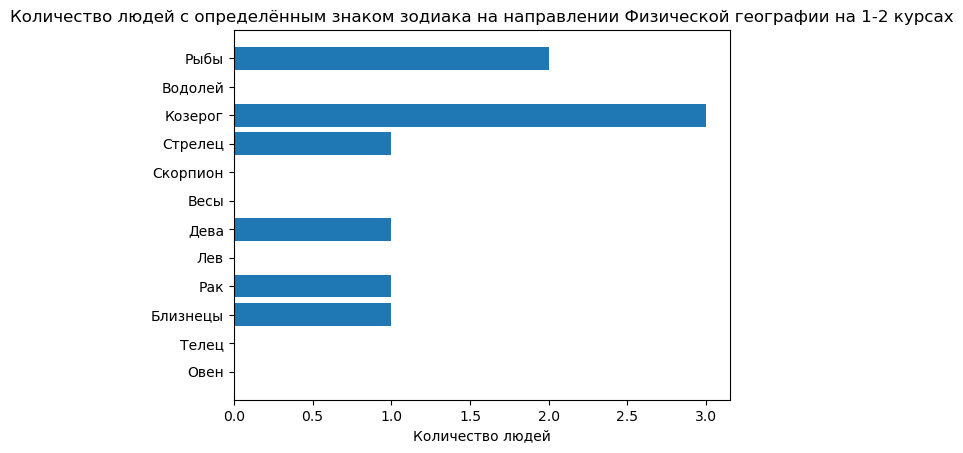

In [80]:
import matplotlib.pyplot as plt # импортируем библиотеку Matplotlib в наш блокнот
plt.barh(list(dict_f_s_c['Физы'].keys()), dict_f_s_c['Физы'].values()) # для визуализации используем горизонтальную столбчатую диаграмму и задаём входные данные
plt.xlabel('Количество людей') # даём название для оси x
plt.title('Количество людей с определённым знаком зодиака на направлении Физической географии на 1-2 курсах') # даём название нашей диаграмме
plt.show() # визуализируем

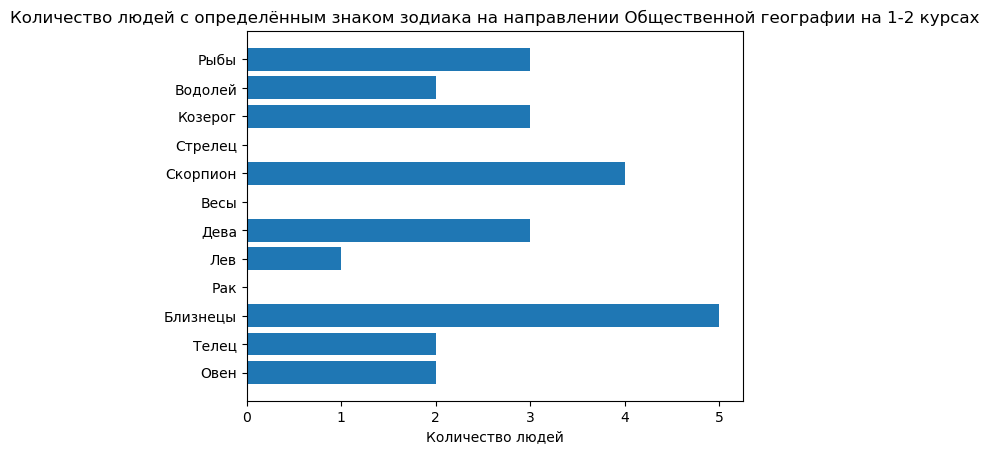

In [82]:
plt.barh(list(dict_f_s_c['Общ'].keys()), dict_f_s_c['Общ'].values())
plt.xlabel('Количество людей')
plt.title('Количество людей с определённым знаком зодиака на направлении Общественной географии на 1-2 курсах')
plt.show()

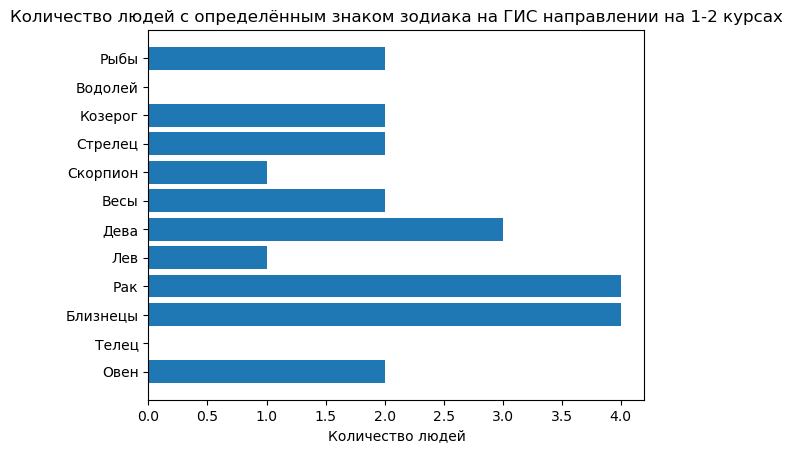

In [84]:
plt.barh(list(dict_f_s_c['ГИС'].keys()), dict_f_s_c['ГИС'].values())
plt.xlabel('Количество людей')
plt.title('Количество людей с определённым знаком зодиака на ГИС направлении на 1-2 курсах')
plt.show()

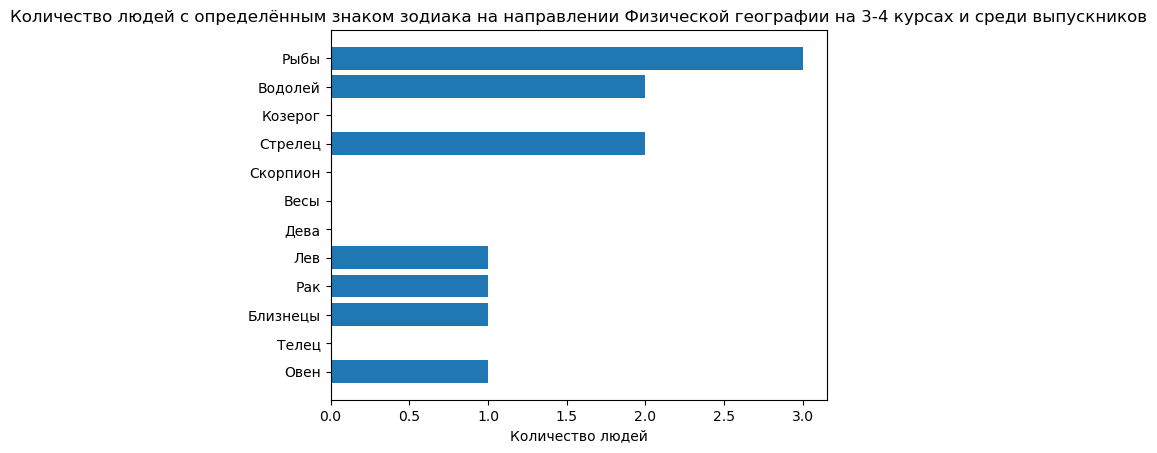

In [86]:
plt.barh(list(dict_t_f_g_c['Физы'].keys()), dict_t_f_g_c['Физы'].values())
plt.xlabel('Количество людей')
plt.title('Количество людей с определённым знаком зодиака на направлении Физической географии на 3-4 курсах и среди выпускников')
plt.show()

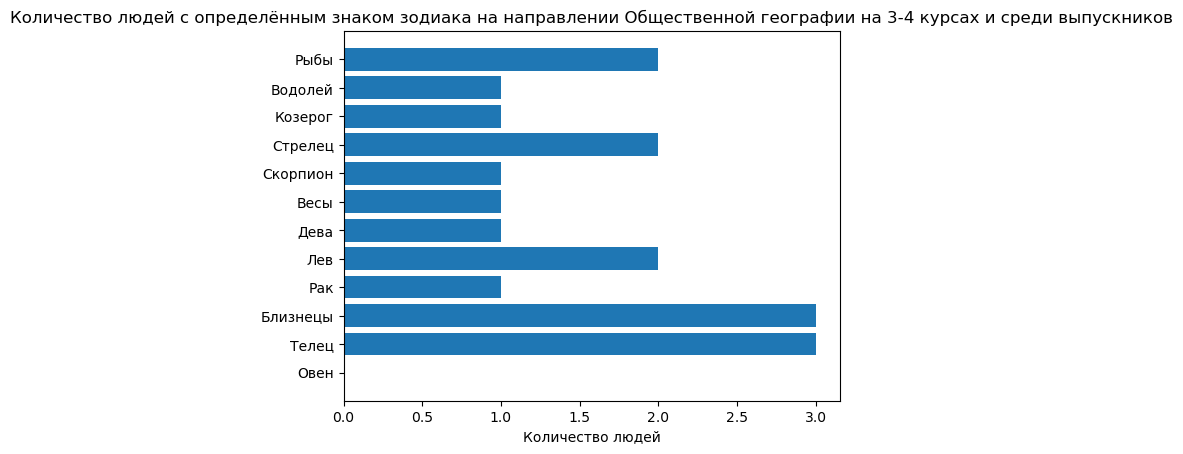

In [88]:
plt.barh(list(dict_t_f_g_c['Общ'].keys()), dict_t_f_g_c['Общ'].values())
plt.xlabel('Количество людей')
plt.title('Количество людей с определённым знаком зодиака на направлении Общественной географии на 3-4 курсах и среди выпускников')
plt.show()

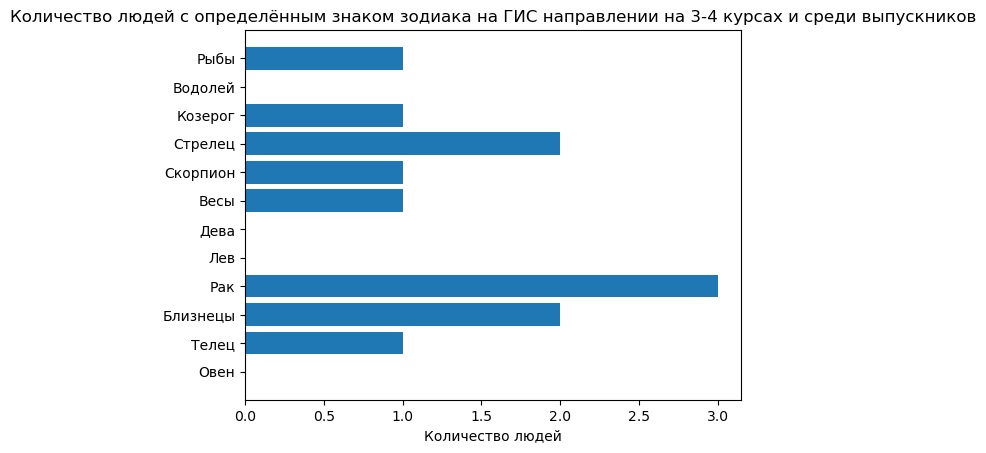

In [90]:
plt.barh(list(dict_t_f_g_c['ГИС'].keys()), dict_t_f_g_c['ГИС'].values())
plt.xlabel('Количество людей')
plt.title('Количество людей с определённым знаком зодиака на ГИС направлении на 3-4 курсах и среди выпускников')
plt.show()

## Выводы

Таким образом, нам удалось получить статистику по количеству знаков зодиака на каждом из направлений ФГГТ, а также отобразить полученные данные в виде столбчатых диаграмм, благодаря чему можно заметить, что некоторая корреляция между нашими объектами исследования, действительно, существует: 

1) На направлении *Физической географии* на 1-2 курсах преобладают **Козероги**♑️ и Рыбы, на 3-4 курсах с большим отрывом - **Рыбы**♓️
   
   Рыбы часто считаются *креативными* и *интуитивными*, что может помочь им в изучении и предсказывании опасных природных явлений. А Козероги обычно *целеустремленные* и *трудолюбивые*, что делает их самыми ответственными и педантичными товарищами во время полевых работ

   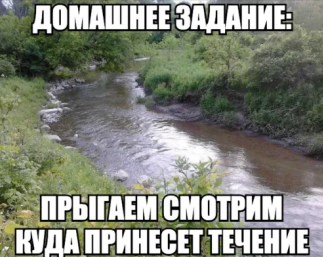

3) На направлении Общественная география на всех курсах (и среди выпускников) вперёд выходят ♊️**Близнецы**♊️

   Близнецы обычно обладают *коммуникативными навыками*, легко устанавливают контакты с людьми и обладают хорошей способностью к *адаптации к различным  ситуациям*. Их любознательность и живой ум помогают им быстро учиться новым вещам и быстро приспосабливаться к неожиданным обстоятельствам. Все эти   качества  невероятны полезны в общественной географии, так как в этой области важно умение общаться с людьми и исследовать социокультурные особенности различных   мест и стран.

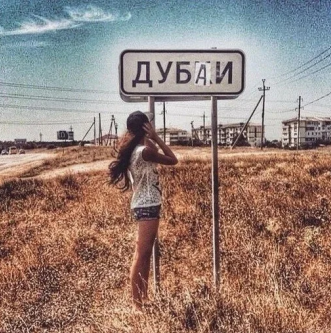
   
   
5) На направлении *ГИС* также на всех курсах лидируют **Раки**♋️ и **Близнецы**

   Близнецы также часто имеют *аналитическое мышление* и способности к обучению и быстрой адаптации к новым технологиям. Раки, в свою очередь, обычно очень *чуткие к деталям*, обладают хорошей интуицией и эмоциональным интеллектом. Такие качества могут быть очень ценными при работе в области геоинформационных систем, где требуется анализ больших объемов данных, способность к изучению новых программ и технологий, а также точное восприятие и понимание информации.

    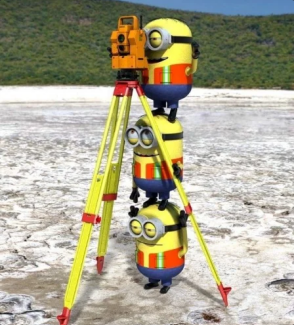

*Текст сформирован при помощи чата GPT*

 ## Заключение

Несмотря на вышесказанное, хочется отметить, что выбор направления - это всегда очень трудный процесс для каждого студента, потому что довольно часто бывает тяжело понять, что конкретно тебя привлекает в твоей сфере деятельности, и, несмотря на сделанные в работе выводы, это не всегда зависит от того, в какой день года ты родился. 
Поэтому при выборе дальнешей траекторией обучения стоит всегда ориентироваться на **зов твоего сердца**. Не бойтесь совершать ошибки, ведь, как говориться, это самый надёжный способ точно понять, **твоя это стихия или нет**. 

*С любовью, создатели проекта, Аня и Маша ❤️*